In [1]:
import numpy as np
import scipy
import pandas as pd
import utils
from utils import QR_Factorization, EVD, SVD, Bidiagonal_fastMult,pic_deblur
import scipy.io
import scipy.linalg
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
#from sklearn import preprocessing

%load_ext autoreload
%autoreload 2

# read the picture

In [2]:

def open_picture(name:str):
    path = './data/test_images/'+name 
    try:   
        im = Image.open(path+'.png')
    except:
        im = Image.open(path+'.jpg')      
    img = np.array(im)
    img = img.astype(np.float64) / 255
    return img

# Whole process

Below the function combines the process of reading in picture, blurring the picture and deblurring the picture

In [3]:
def working_procee(name,blur_type,power,trunc,deblur_tpye):
    """
    Args:
        name(string):                       The name of the picture. e.g. 1024_1024_books (no suffix is required)
        blur_type(string):                  There are three blur types to choose.
                                            tridiagonal refers to the gaussian blur matrix given in asg3 problem4.
                                            gaussian refers to the blur matrix
        power(list[int,int])                The power wanted to use for the blurring matirx.
                                            First one refers to the power for left blur matrix and second one refers to the power for right blur matrix.
        trunc(list[int,int])                The list of range used to calculate the truncated inverse.           
                                            First one refers to the truncaion used for left blur matrix and second one refers to truncation used for the right blur matrix.    
        deblur_tpye(list[str,str]):            The svd method we use to do the svd decomposition.
                                            First one refers to the svd decomposition used for left blur matrix and second one refers to svd decomposition used for the right blur matrix.    
                                            scipy refers to the Scipy svd decomposition;
                                            A refers to the method in problem1 phaseI and IIA;
                                            B1 referse to the method in porblem1 phaseI and IIB;

    """
    img_data = open_picture(name)
    blur_kernel,blur_data = pic_deblur.blur_picture(img_data,blur_type,power)
    begin = time.time()
    deblur_data,psnr,time_svd = pic_deblur.deblur_picture(blur_kernel,blur_data,trunc,deblur_tpye,img_data)
    time_used = time.time()-begin
    data = [img_data,blur_data,deblur_data]
    result_df = pd.DataFrame()
    result_df['time_used_for_deblurring'] = [time_used]
    result_df['average_psnr'] = [psnr]
    result_df['time_used_for_svd_l'] = [time_svd[0]]
    result_df['time_used_for_svd_r'] = [time_svd[1]]
    return data,blur_kernel,result_df

In [58]:
data,blur_kernel,result_df = working_procee('1024_1024_city',['tridiagonal','tridiagonal'],[66,66],[200,200],['B','B'])

phaseI: 11.8518s
phaseII: 8.6248s
phaseI: 12.8212s
phaseII: 8.7310s


In [56]:
result_df

,time_used_for_deblurring,average_psnr,time_used_for_svd_l,time_used_for_svd_r
0,47.749932,20.402062,15.140969,16.282885


# Draw the singular value

phaseI: 1.3561s
phaseII: 0.8151s


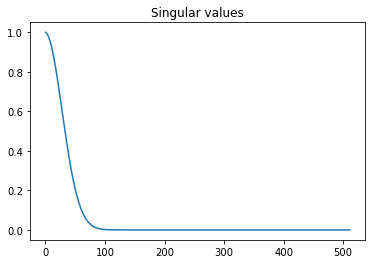

In [37]:
T = pic_deblur.generate_T(512,'tridiagonal',66)
pic_deblur.singular_drawing(T,['A'])

phaseI: 1.2851s
phaseII: 0.4114s


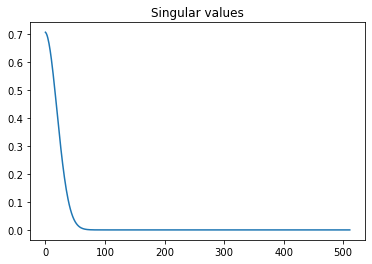

In [39]:
T = pic_deblur.generate_T(512,'gaussian',66)
pic_deblur.singular_drawing(T,['A'])

# Draw the truncation

In [ ]:
r_range = np.arange(30,200,15)
l_range = np.arange(30,200,15)
effectf = np.zeros((r_range.shape[0],l_range.shape[0]))
for r in range(len(r_range)):
    for l in range(len(l_range)):
        data,blur_kernel,result_df = working_procee('512_512_ducks',\
            ['tridiagonal','gaussian'],[66,66],[l_range[l],r_range[r]],['A','A'])
        effectf[r,l] = result_df['average_psnr'].values[0]


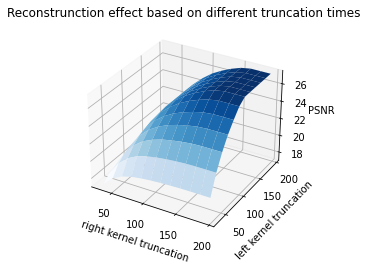

In [82]:
X = r_range
Y = l_range
X, Y = np.meshgrid(X, Y)
Z = effectf
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z,  cmap=cm.Blues)
ax.set_xlabel("right kernel truncation")
ax.set_ylabel("left kernel truncation")
ax.set_zlabel("PSNR")
ax.set_title("Reconstrunction based on different truncation times")

plt.show()

# Compare accuracy and run time

In [ ]:
a = ['A','B']
b = ['tridiagonal','box','gaussian']
for j in b:
    for i in a:
        print(j,i)
        data,blur_kernel,result_df = working_procee('256_256_casino',[j,j],[66,66],[70,70],[i,i])
        print('casino')
        print(result_df)
        data,blur_kernel,result_df = working_procee('512_512_ducks',[j,j],[66,66],[120,120],[i,i])
        print('ducks')
        print(result_df)
        data,blur_kernel,result_df = working_procee('1024_1024_bluestreet',[j,j],[66,66],[200,200],[i,i])
        print('bluestreet')
        print(result_df)
        print()
